## Plotting Data
In this assignment we will gain experience plotting scientific data. We will also have to consider how the data are stored, introducing the numpy array. 

### Matplotlib
This is a Python library for plotting. It has been around a while, does not have many errors, is well documented, and is flexible. I'll be introducing bits of it throughout the course. For now, you need to know that the documentation is [here](http://matplotlib.org/contents.html). The [gallery](http://matplotlib.org/gallery.html) is also a good resource if you like to see an example of what you want to do, and the code to produce it.

### Numpy Arrays 
Numpy provides a library for fast manipulation of numerical data. It allows for the creation of _arrays_ which store numerical data. To see the power of `numpy`, consider the following:


In [7]:
from __future__ import print_function
from numpy import array,sin #numpy sine is able to work with multiple numbers, math only handles one number
x = array([1,2,3,4,5,6.])
y = array([10,9,8,7,6,5.])
print(x + y)
print(x * y)
print(x / y) #arrays ONLY store numerical values, which gives it greater speed
print(sin(x))
print(x>=4)
x[x>=2]=2 #all numbers greater than or equal to two are replaced with 2
print(x)

[ 11.  11.  11.  11.  11.  11.]
[ 10.  18.  24.  28.  30.  30.]
[ 0.1         0.22222222  0.375       0.57142857  0.83333333  1.2       ]
[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155 ]
[False False False  True  True  True]
[ 1.  2.  2.  2.  2.  2.]


Numpy allows large data sets to be operated on like a single number, _provided that the arrays have the same size_. This is more powerful than you can imagine. The arithmetic is done at the same speed that compiled code runs. It is also possible to do many convenient things by taking subsets of the arrays. 

Note that the `sin` function has to be imported from `numpy`, and not `math`. This is key: the `sin` in `math` only allows one number to be evaluated at a time. The `sin` function from `numpy` can evaluation many numbers (a `numpy` array) at once!

#### Pylab

Pylab is an collection of Python features, including `numpy`, and `matplotlib`. The idea is to make it convenient to import things from a single place. Below, you'll notice me use it instead of importing from the specific libraries. Note: the ultimate goal of Pylab is to produce a MatLab like experience from a single environment in Python. As such, the creators do encourage users to simply do ''from pylab import *''. I've been discouraging that in this class, but you're free to try. Just be aware that some things won't work as you expect.

## An example
### Preliminaries
Begin by importing the plot libraries and data handling functions from `pylab`. Additionally, there is a ['magic'](https://ipython.org/ipython-doc/dev/interactive/magics.html) command that forces the plots to be displayed within the Jupyter window. This is not required if you are using Spyder.

In [8]:
from pylab import plot,linspace  # get the functions needed
#iPython will place plots in the body of the notebook
%matplotlib inline                

### A first plot
Let's return to the normal distribution for our first plot. We declare the function, an array of data to pass to it, and it's return. 

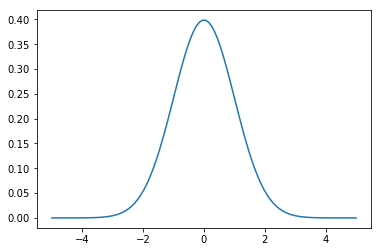

In [9]:
from pylab import pi,exp,sqrt # These are from pylab, and not math. See above for why.

# Recall you did something like this in the first assignment.
def n(x,sigma,mu): 
    return 1./ ( sigma * sqrt(2*pi) ) * exp( - (x - mu)**2 / (2 * sigma**2))

x = linspace(-5,5,100) # an array of numbers, from -6 to 6, 100 points, including ends
y = n(x,1,0)           # call the function to get all y points

plot(x,y); # plot the x,y data - note the ';' after the call. This suppresses a message


### Improvements
That's not the best plot. It lacks some basic information about what is shown, and the axes run beyond the data. Let's clean it up with the following. This example is to show you some of the features that can be accessed in `matplotlib`.


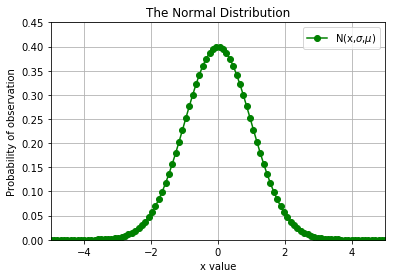

In [10]:
from pylab import xlim,ylim,title,xlabel,ylabel,legend,grid # try and be explicit about what is imported

xlim(-5,5)                           # Define x limits
ylim(0,.45)                          # y limits
title("The Normal Distribution")     # graph title
xlabel("x value")                    # x axis label
ylabel("Probability of observation") # y axis label
plot(x,y,'go-')                      # plot, but with green (g) dots (o) connected by lines (-)
legend(["N(x,$\sigma$,$\mu$)"])      # legend, note the use of Latex symbols!
grid()                               # Sometimes I like a grid.

### A second plot
The type of plot we just produced is called a scatter plot. Another common plot is the histogram. Lets do one of those, using the `randn` function from `pylab`.

(-4, 4)

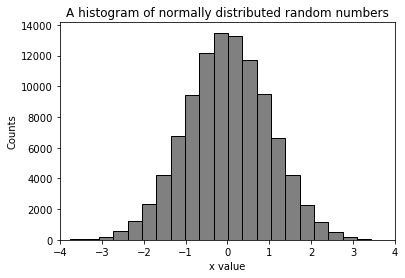

In [11]:
from pylab import hist, randn

n = randn(100000)   # Create an array of 1000 random numbers, zero mean, one standard deviation
bin_centers = hist(n,25,color='grey', #ec='black' is required to get the lines to show up on the historgram
                   ec='black'); # 25 bins, grey color, return the bin centers to a variable bin_centers.
title("A histogram of normally distributed random numbers");
xlabel("x value");
ylabel("Counts");
xlim([-4,4])

### Assignment 
Combine the histogram and the scatter plot in a single plot that shows both the theoretical curve \\(N(x,\sigma,\mu)\\), as well as the results of the `randn` function for sample sizes of 1e3, 1e4, 1e6, 1e8. The result will be 4 total plots. Include labels, titles, grids, and legends. Comment below the plots on the impact of increasing the number of random numbers. Use a number of bins that makes for an attractive plot.

#### Hints
* Look at the documentation for `hist`. Can you change the y axis to probability, instead of counts?
* Observe the behavior of making multiple plots from single cell. This is key.
* You will definetely have to consult the documentation in order to achieve your goals here. 

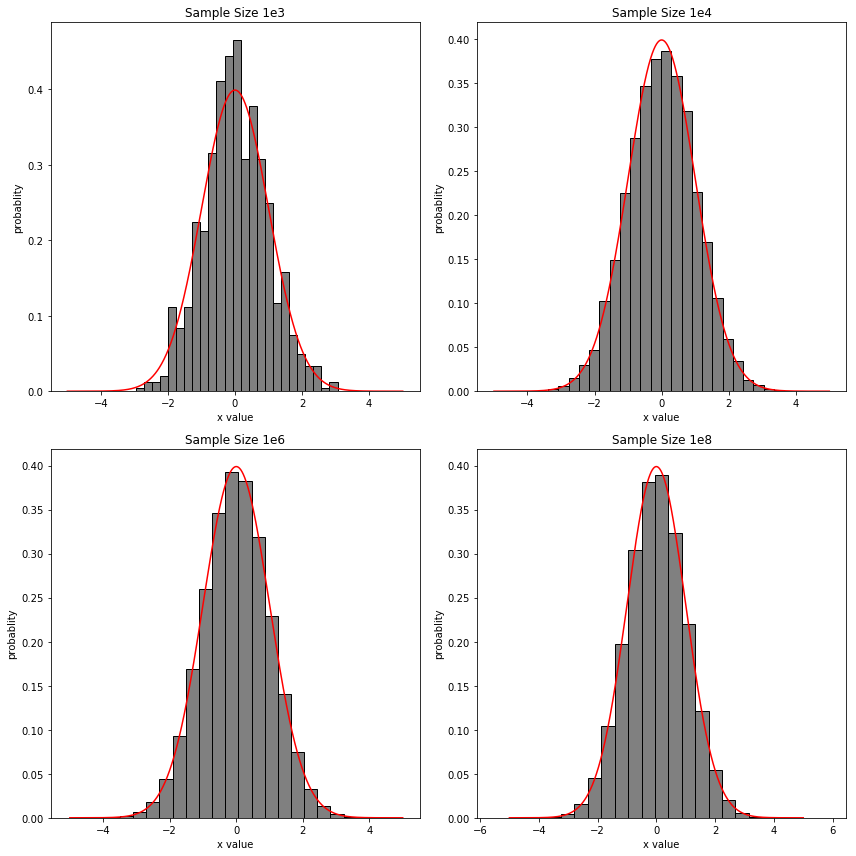

In [12]:
#importing everythign we need
from pylab import plot,hist,subplot,linspace,randn, pi, exp, sqrt, ylabel, xlabel, title, show, tight_layout, figure
#%matplotlib inline #this must be declared if you are running just this cell by itself

#defining our function
def n(x,sigma,mu): 
    return 1./ ( sigma * sqrt(2*pi) ) * exp( - (x - mu)**2 / (2 * sigma**2))

#defining a function to generate the data we want to plot
def sam_ret(size):
    x = linspace(-5,5,size) # an array of numbers, from -6 to 6, 100 points, including ends
    y = n(x,1,0)           # call the function to get all y points
    a = randn(size) # create an array of 1000 random numbers, zero mean, one standard deviation
    return (x,y,a) #returning a tuple that can be unpacked later

#declaring the size of the overall figure
figure(figsize=(12,12))

#creating a 1e3 subplot
subplot(2, 2, 1) #a subplot has (y,x,position on grid) arguments , position 1 is top left
x1,y1,a1=sam_ret(10**3) #unpacking of values from the tuple returned by the function
plot(x1, y1, 'red'); #this is our normal distribution plot with x,y values and a color of green
#this is our histogram with data, bin values, fill in colors for bins, bin outline colors, and normalizing to probablty
hist(a1,25,color='grey', ec='black', normed=True);
title('Sample Size 1e3') #the title of our subplot
xlabel('x value') #labels x-axis
ylabel('probablity') #labels y-axis

#creating a 1e4 subplot
subplot(2, 2, 2)
x2,y2,a2=sam_ret(10**4)
plot(x2, y2, 'red');
hist(a2,25,color='grey', ec='black',normed=True);
title('Sample Size 1e4')
xlabel('x value')
ylabel('probablity')

#creatign a 1e6 subplot
subplot(2, 2, 3)
x3,y3,a3=sam_ret(10**6)
plot(x3, y3, 'red');
hist(a3,25,color='grey', ec='black', normed=True);
title('Sample Size 1e6')
xlabel('x value')
ylabel('probablity')

#creating a 1e8 subplot
subplot(2, 2, 4)
x4,y4,a4=sam_ret(10**8)
plot(x4, y4, 'red');
hist(a4,25,color='grey', ec='black', normed=True);
title('Sample Size 1e8')
xlabel('x value')
ylabel('probablity')

#thsi makes it so the plots don;t overlap with each other
tight_layout()

#telling for the plots to be displayed
show()